<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
data = pd.read_csv('/content/sample_data/train.csv')

In [4]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [5]:
data.head(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
5,25,19.80,475.2,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
6,27,90.15,2423.4,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),0
7,1,45.70,45.7,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
8,50,105.95,5341.8,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
9,72,61.20,4390.25,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0


In [6]:
data.isna().count()


ClientPeriod                5282
MonthlySpending             5282
TotalSpent                  5282
Sex                         5282
IsSeniorCitizen             5282
HasPartner                  5282
HasChild                    5282
HasPhoneService             5282
HasMultiplePhoneNumbers     5282
HasInternetService          5282
HasOnlineSecurityService    5282
HasOnlineBackup             5282
HasDeviceProtection         5282
HasTechSupportAccess        5282
HasOnlineTV                 5282
HasMovieSubscription        5282
HasContractPhone            5282
IsBillingPaperless          5282
PaymentMethod               5282
Churn                       5282
dtype: int64

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [8]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce')

Text(0.5, 1.0, 'TotalSpent')

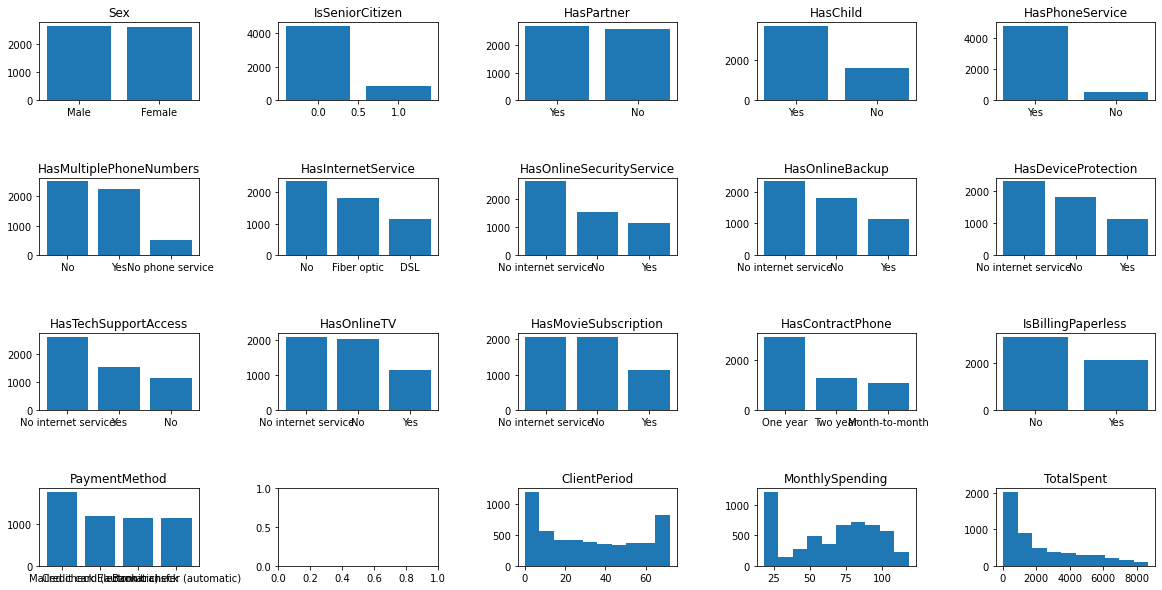

In [37]:
fig, axs = plt.subplots(4,5, figsize=(20, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=.5)

axs = axs.ravel()

for i in range(len(cat_cols)):
  col = cat_cols[i]
  axs[i].bar(data[col].unique(), data[col].value_counts())
  axs[i].set_title(col)

#    'MonthlySpending',
#    'TotalSpent'
axs[len(cat_cols) + 1].hist(data['ClientPeriod'])
axs[len(cat_cols) + 1].set_title('ClientPeriod')

axs[len(cat_cols) + 2].hist(data['MonthlySpending'])
axs[len(cat_cols) + 2].set_title('MonthlySpending')

axs[len(cat_cols) + 3].hist(data['TotalSpent'])
axs[len(cat_cols) + 3].set_title('TotalSpent')

<BarContainer object of 2 artists>

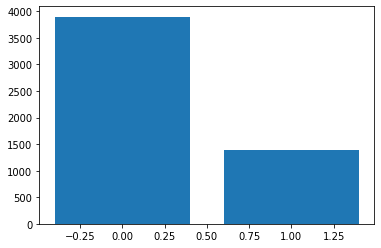

In [36]:
plt.bar(data["Churn"].unique(), data["Churn"].value_counts())


(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [49]:
data.dropna(inplace=True)

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [50]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [113]:
X = pd.get_dummies(data=data[cat_cols], drop_first=True)
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(data[num_cols])
X.head()
y = data[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [73]:
grid_values = {'penalty': ['l1','l2'], 'Cs': [0.001,0.01,0.1,1,10,100,1000]}
lr = LogisticRegressionCV()
model_lr = GridSearchCV(lr, param_grid=grid_values,scoring='roc_auc')
model_lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: object of type 'float' has no len()

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: object of type 'float' has no len()

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. 

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegressionCV(Cs=10, class_weight=None, cv=None,
                                            dual=False, fit_intercept=True,
                                            intercept_scaling=1.0,
                                            l1_ratios=None, max_iter=100,
                                            multi_class='auto', n_jobs=None,
                                            penalty='l2', random_state=None,
                                            refit=True, scoring=None,
                                            solver='lbfgs', tol=0.0001,
                                            verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'Cs': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [74]:
model_lr.score(X_test, y_test)

0.8411015932431135

In [76]:
roc_auc_score(y_test, model_lr.predict(X_test))

0.7146404919583726

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

**best parameters**
Cs=10, class_weight=None, cv=None, dual=False,
                      fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                      max_iter=100, multi_class='auto', n_jobs=None,
                      penalty='l2', random_state=None, refit=True, scoring=None,
                      solver='lbfgs', tol=0.0001, verbose=0

 **BEST ROC_AUC** : 0.7146404919583726

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [85]:
!pip install catboost


In [101]:
from catboost import CatBoostClassifier, Pool

X_train, X_test, y_train, y_test = train_test_split(data.drop(["Churn"],axis=1), data["Churn"], test_size=0.33, random_state=42)
model = CatBoostClassifier(iterations=10, learning_rate=.6)
model.fit(X_train, y_train,cat_features=cat_cols)
roc_auc_score(y_test, model.predict(X_test))





0:	learn: 0.5317555	total: 4.82ms	remaining: 43.4ms
1:	learn: 0.4809957	total: 9.61ms	remaining: 38.4ms
2:	learn: 0.4481800	total: 14ms	remaining: 32.6ms
3:	learn: 0.4283371	total: 18.5ms	remaining: 27.8ms
4:	learn: 0.4199553	total: 23.3ms	remaining: 23.3ms
5:	learn: 0.4139019	total: 25.6ms	remaining: 17.1ms
6:	learn: 0.4053806	total: 29.9ms	remaining: 12.8ms
7:	learn: 0.4012481	total: 34.1ms	remaining: 8.53ms
8:	learn: 0.3972470	total: 38.4ms	remaining: 4.27ms
9:	learn: 0.3929930	total: 42.7ms	remaining: 0us


0.7104311491368791

In [108]:
from xgboost import XGBClassifier

X = pd.get_dummies(data=data[cat_cols], drop_first=True)
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(data[num_cols])
y = data[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



grid_values = {'eta': [.7,.6,.5,.4,.3,.2,.1,0.05,.001], 'max_depth': [2,3,4,5,6,7,8,9,10]}
model = XGBClassifier()
model_search = GridSearchCV(model, param_grid=grid_values,scoring='roc_auc')
model_search.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'eta': [0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05,
                                 0.001],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8,

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

**Best model** : XGBBoost
**BEST parameters** : base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1)
**best score at Kagle** : 0.85285

# Предсказания

In [109]:
best_model = model_search

In [119]:
X_test = pd.read_csv('/content/sample_data/test.csv')
X_test['TotalSpent'] = pd.to_numeric(X_test['TotalSpent'], errors='coerce')
X = pd.get_dummies(data=X_test[cat_cols], drop_first=True)

#scaler = StandardScaler()

X[num_cols] = scaler.transform(X_test[num_cols])


submission = pd.read_csv('/content/sample_data/submission.csv')

submission['Churn'] =  1 - best_model.predict_proba(X)
submission.to_csv('/content/sample_data/my_submission.csv')

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.